In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
event_data = pd.read_csv('data/event_data_train.csv')

In [5]:
event_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [6]:
print(event_data['action'].unique(), '\n')
print(event_data['action'].nunique())

['viewed' 'passed' 'discovered' 'started_attempt'] 

4


In [7]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [8]:
event_data.isnull().sum()

step_id      0
timestamp    0
action       0
user_id      0
dtype: int64

In [9]:
event_data['date'] = pd.to_datetime(event_data['timestamp'], unit='s')

In [10]:
event_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [11]:
print(event_data['date'].max())
print(event_data['date'].min())

2018-05-19 23:33:31
2015-06-15 04:00:48


In [12]:
event_data['day_date'] = event_data['date'].dt.date

In [13]:
event_data.head()

,step_id,timestamp,action,user_id,date,day_date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


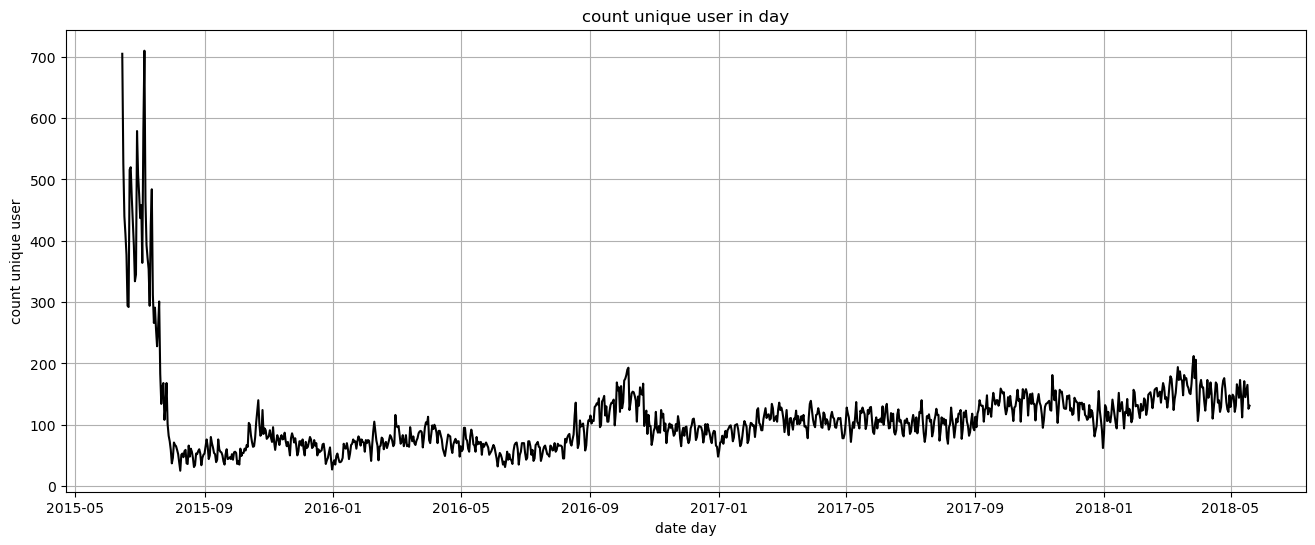

In [14]:
plt.figure(figsize=(16, 6))
plt.plot(event_data.groupby('day_date')['user_id'].nunique(), color='black')
plt.xlabel('date day')
plt.ylabel('count unique user')
plt.title('count unique user in day')
plt.grid();

In [15]:
passed_count_step = (event_data[event_data.action == 'passed']
                     .groupby('user_id')
                     .agg({'step_id': 'count'})
                     .rename(columns={'step_id': 'passed_count_step'}))

In [16]:
passed_count_step

,passed_count_step
user_id,
2,9
3,87
5,11
7,1
8,84
...,...
26789,2
26790,8
26794,69


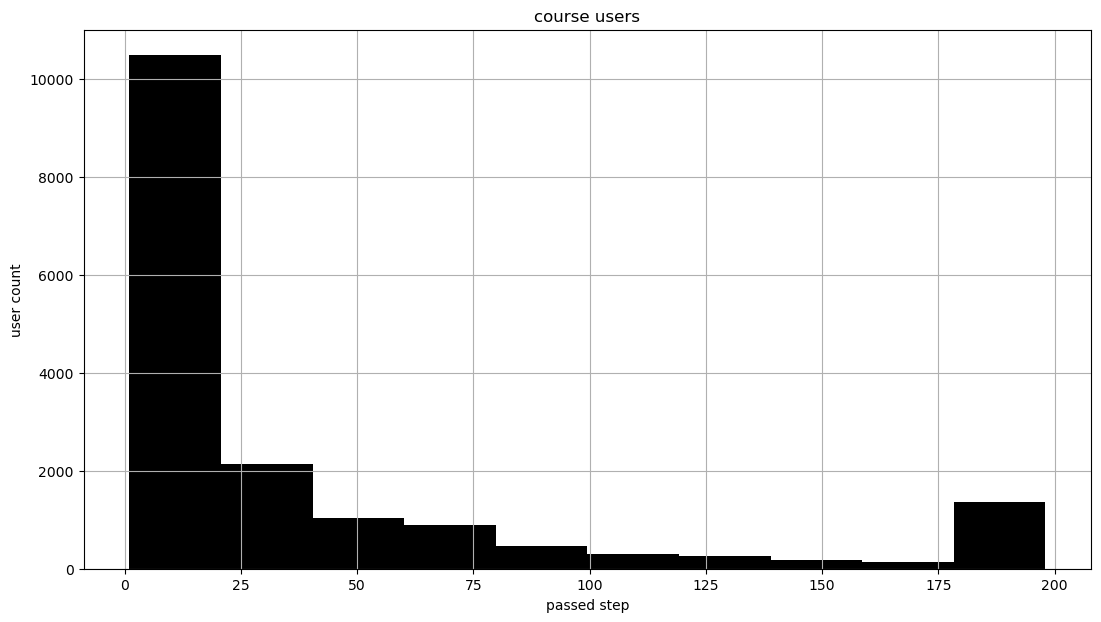

In [17]:
plt.figure(figsize=(13,7))
plt.hist(passed_count_step, color='black')
plt.ylabel('user count')
plt.xlabel('passed step')
plt.title('course users')
plt.grid();

In [18]:
viewed_count_step = (event_data[event_data.action == 'viewed']
                     .groupby('user_id')
                     .agg({'step_id': 'count'})
                     .rename(columns={'step_id': 'viewed_count_step'}))

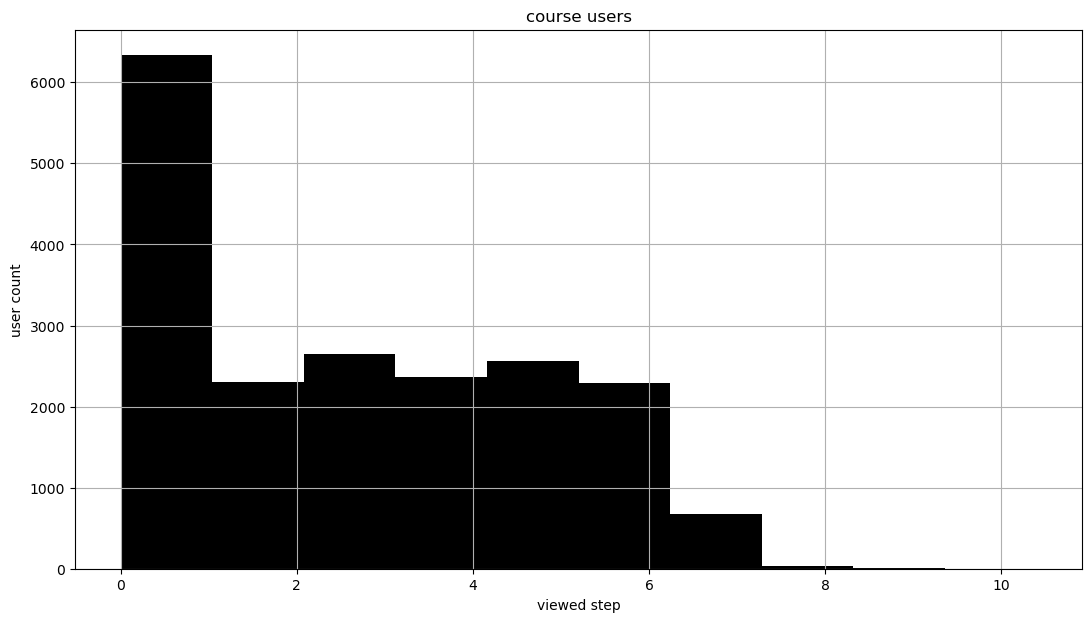

In [19]:
plt.figure(figsize=(13,7))
plt.hist(np.log(viewed_count_step), color='black')
plt.ylabel('user count')
plt.xlabel('viewed step')
plt.title('course users')
plt.grid();

In [20]:
print(passed_count_step.index.nunique())
print(event_data.user_id.nunique())
print(viewed_count_step.index.nunique())

17262
19234
19227


In [21]:
event_data.head()

,step_id,timestamp,action,user_id,date,day_date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


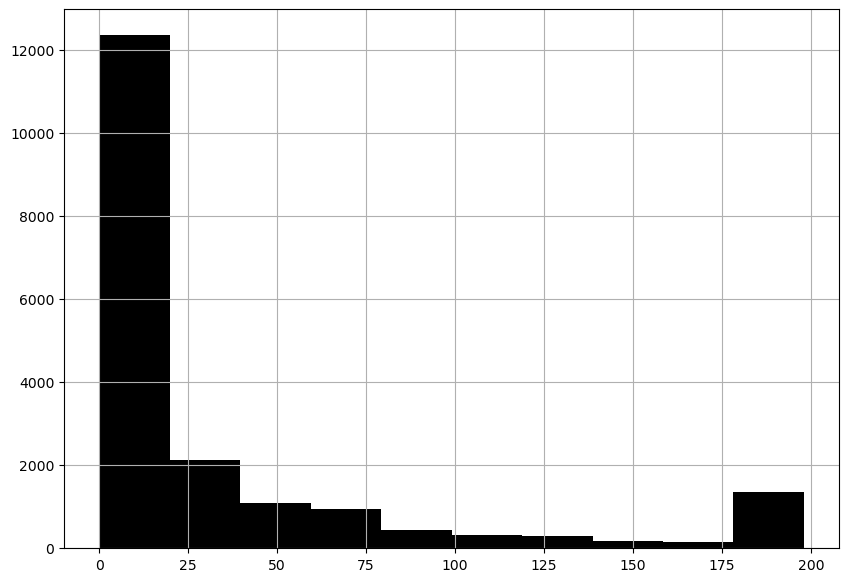

In [22]:
event_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)['passed'].hist(color='black', figsize=(10,7));

In [23]:
submissions_data = pd.read_csv('data/submissions_data_train.csv')

In [24]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [25]:
submissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509104 entries, 0 to 509103
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   step_id            509104 non-null  int64 
 1   timestamp          509104 non-null  int64 
 2   submission_status  509104 non-null  object
 3   user_id            509104 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 15.5+ MB


In [26]:
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit='s')

In [27]:
submissions_data['day'] = submissions_data['date'].dt.date

In [28]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [29]:
submission_status_df = submissions_data.pivot_table(index='user_id', 
                                                    columns='submission_status', 
                                                    values='step_id', 
                                                    aggfunc='count', 
                                                    fill_value=0).reset_index()

In [30]:
date_difference = (event_data[['user_id', 'day_date', 'timestamp']]
            .drop_duplicates(subset=['user_id', 'day_date'])
            .groupby('user_id')['timestamp'].apply(list)
            .apply(np.diff)).values

In [31]:
date_difference = np.concatenate(date_difference, axis=0)

In [32]:
date_difference = date_difference/(60*60*24)

In [33]:
date_difference = pd.Series(date_difference)

In [34]:
date_difference.head()

0    56.060208
1    79.852419
2     2.112083
3     1.084606
4    32.047106
dtype: float64

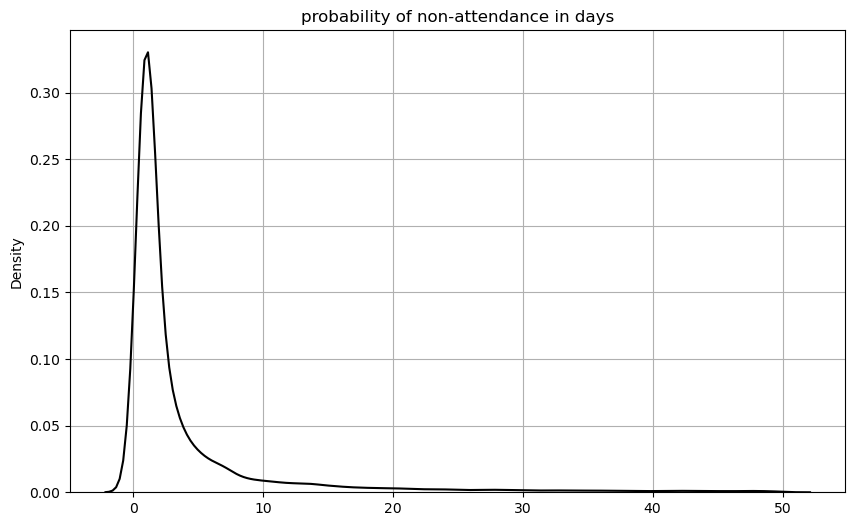

In [35]:
plt.figure(figsize=(10,6))
sns.kdeplot(date_difference[date_difference<50], color='black')
plt.title('probability of non-attendance in days')
plt.grid();

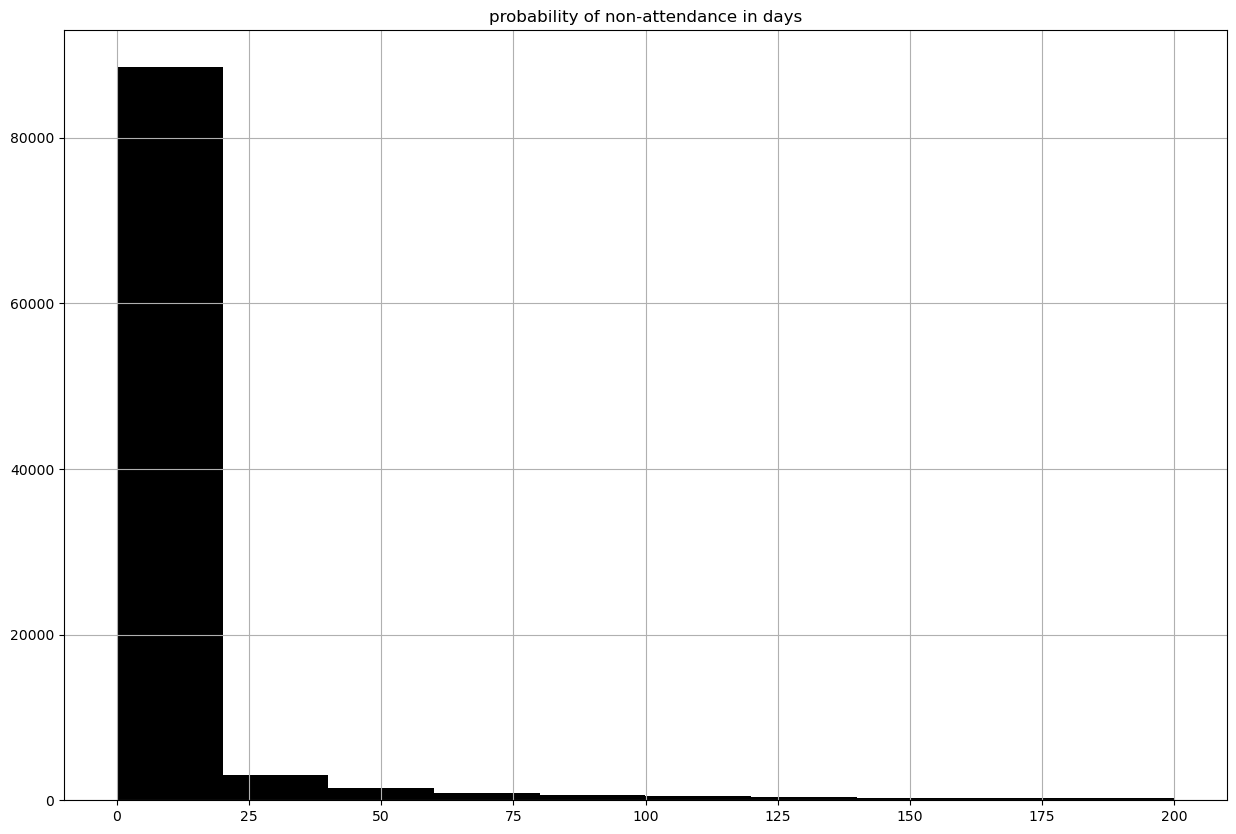

In [36]:
plt.figure(figsize=(15,10))
plt.hist(date_difference[date_difference<200], color='black')
plt.title('probability of non-attendance in days')
plt.grid();

In [37]:
print(date_difference.quantile(0.95))
print(date_difference.quantile(0.90))

59.760440972222156
18.325995370370403


users who have completed the course and users who are 30 days behind are dropped

In [38]:
last_day_activity = event_data.groupby('user_id', as_index=False)['timestamp'].max()

In [39]:
60*60*24*30

2592000

In [40]:
event_data.tail()

,step_id,timestamp,action,user_id,date,day_date
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [41]:
thirty_days_unix = 2592000
now = 1526772811

In [42]:
last_day_activity['gone_user'] = (now - last_day_activity['timestamp'])>thirty_days_unix

In [43]:
last_day_activity.head()

,user_id,timestamp,gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [44]:
user_scores = (submissions_data
               .pivot_table(columns='submission_status', index='user_id', values='step_id', aggfunc='count', fill_value=0)
               .reset_index())

In [45]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [46]:
last_day_activity.merge(user_scores, on='user_id', how='outer').fillna(0).head()

,user_id,timestamp,gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [47]:
user_data = last_day_activity.merge(user_scores, on='user_id', how='outer').fillna(0)

In [48]:
user_data.head()

,user_id,timestamp,gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [49]:
user_event_data = event_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()

In [50]:
user_event_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [51]:
user_data = user_data.merge(user_event_data, on='user_id', how='outer').fillna(0)

In [52]:
user_data.rename(columns={'timestamp': 'last_timestamp'}, inplace=True)

In [53]:
user_data.head()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [54]:
days_user = event_data.groupby('user_id')['day_date'].nunique().to_frame().reset_index()

In [55]:
days_user.head()

,user_id,day_date
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [56]:
user_data = user_data.merge(days_user, on='user_id', how='outer')

In [57]:
user_data.head()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day_date
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [58]:
print(user_data['user_id'].nunique())
print(event_data['user_id'].nunique())

19234
19234


In [59]:
user_data['graduated'] = user_data['passed'] > 170

In [60]:
user_data.head()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day_date,graduated
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [61]:
user_data[user_data['graduated']==True].head()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day_date,graduated
9,16,1513162585,True,77.0,106.0,196,196,108,651,21,True
13,22,1507142631,True,76.0,47.0,198,198,89,492,32,True
18,30,1510574287,True,119.0,79.0,198,198,150,512,42,True
22,34,1525626844,False,77.0,85.0,198,195,92,1013,60,True
26,39,1502712399,True,77.0,29.0,198,198,88,1160,170,True


In [62]:
user_data['graduated'].sum()

1425

In [63]:
user_data.groupby('graduated').count()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day_date
graduated,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [64]:
1425/17809*100

8.001572238755687

In [65]:
user_data.to_csv('data/post_processing_data.csv', index=False)